# 第2部分 统计学

<!--
主要参考 
https://ethanweed.github.io/pythonbook/landingpage.html
https://scipy-lectures.org/packages/statistics/index.html
An Introduction to Statistics with Python: With Applications in the Life Sciences 2nd
 -->

1. 基本统计检验
2. 参数检验
3. 方程分析
4. 非参数检验
5. 相关性和回归
6. 聚类分析
7. 因子分析
8. 判别分析（分类）

## 需要用到的工具

### seaborn绘图包


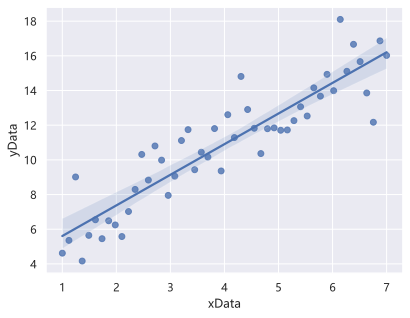

In [9]:
# 导入要用到的包和进行一些基础设置，这段代码拷贝即可

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()  # 默认用seaborn的绘图样式

plt.rcParams["font.sans-serif"] = [
    "Microsoft YaHei"
]  # 设置字体。如果不设置，中文会乱码。这里采用微软雅黑'Microsoft YaHei'，如果显示不正常，也可以使用黑体'SimHei'或者宋体'SimSun'等
plt.rcParams["axes.unicode_minus"] = False  # 该语句解决图像中的“-”负号的乱码问题

# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']


# 生成数据并绘图 ==========================
x = np.linspace(1, 7, 50)
y = 3 + 2 * x + 1.5 * np.random.randn(len(x))
df = pd.DataFrame({"xData": x, "yData": y})
sns.regplot(df, x="xData", y="yData")
plt.show()

## 统计学包


pingouin：一个常用的统计学包。首次运行，可以在一个单元格中执行以下命令按照装这个包。注意安装之后就不需要再执行了。

`!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple pingouin`

In [23]:
import pingouin as pg
from scipy import stats


# 生成虚拟数据
np.random.seed(123)
x = np.arange(100)
y = 1.5 * x + 50 + 10 * np.random.randn(len(x))

# 用pg做一个简单线性回归
lm = pg.linear_regression(x, y).round(2)
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,50.13,2.26,22.16,0.0,0.94,0.94,45.64,54.62
1,x1,1.50,0.04,38.06,0.0,0.94,0.94,1.42,1.58


statsmodels，另一个常用统计学工具包


In [25]:
import statsmodels.formula.api as sm

# Generate noisy line, and save data in a pd-DataFrame
x = np.arange(100)
y = 0.5 * x - 20 + np.random.randn(len(x))
df = pd.DataFrame({"x": x, "y": y})
# Fit a linear model, using the "formula" language
# added by the package "patsy"
model = sm.ols("y~x", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.164e+04
Date:                Thu, 11 Apr 2024   Prob (F-statistic):          8.94e-117
Time:                        10:48:09   Log-Likelihood:                -138.22
No. Observations:                 100   AIC:                             280.4
Df Residuals:                      98   BIC:                             285.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.8325      0.193   -102.607      0.0